In [25]:
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr

import cartopy as cr
import cartopy.crs as ccrs
import cartopy.feature as cf

In [26]:
file = xr.open_dataset('../task-3/cru_ts4.06.india.JJAS.pre.anamoly.std.dat.nc')

In [27]:
file_avg = np.mean(file['pre'],axis=(0))

In [28]:
file_avg.shape

(58, 100)

In [29]:
lat = file.pre.lat
lon = file.pre.lon

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


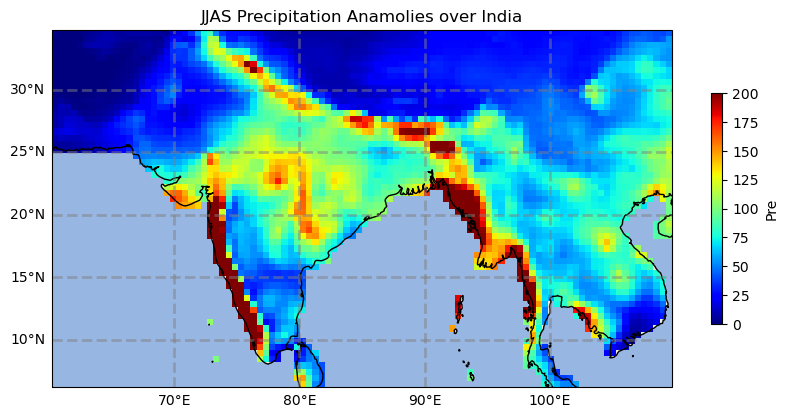

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(file_avg,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower',vmin=0,vmax=200)

ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.OCEAN)

cbar = fig.colorbar(mp, shrink=0.3,label='Pre')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

plt.title('JJAS Precipitation Anamolies over India')
plt.savefig("../task-3/plots/JJAS Precipitation Anamolies over India.jpeg")

In [12]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Load the CRU TS 4.05 precipitation dataset
cru_data = xr.open_dataset('cru_ts4.06.1901.2021.pre.dat.nc')

# Extract the JJAS precipitation values for the period 1960-2015
jjas_data = cru_data.sel(time=slice('1960', '2015'), lat=slice(35, 5), lon=slice(65, 100)).pre

#Calculate the average JJAS precipitation for the reference period of 1960-1990 for each grid cell
ref_period = slice('1960', '1990')
jjas_ref_mean = jjas_data.sel(time=ref_period).mean(dim='time')

# Calculate the JJAS precipitation anomalies for each year for each grid cell
jjas_anomalies = jjas_data.groupby('time') - jjas_ref_mean


ValueError: incompatible dimensions for a grouped binary operation: the group variable 'time' is not a dimension on the other argument